In [20]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
dataframe = pd.read_csv("Test_RiggingDataSet.csv")
dataframe.columns = ['x-axis','y-axis','z-axis','voltage','current','temperature','fault']

In [14]:
#if any data vaule is missing
dataframe.isnull().any().sum()

0

In [22]:
dataframe.head(-15)

,x-axis,y-axis,z-axis,voltage,current,temperature,fault
0,-2.83,4.49,-4.08,5.11719,3.16723,23,Hindrance
1,3.51,-4.17,0.43,5.10742,2.90329,23,Hindrance
2,1.50,-3.99,0.13,5.10742,2.90329,23,Hindrance
3,-0.88,-0.15,2.63,5.08789,2.37542,23,Hindrance
4,1.31,0.83,0.92,5.06836,1.84755,23,Hindrance
...,...,...,...,...,...,...,...
19980,-2.80,3.97,-4.16,5.05859,1.58361,34,Clean
19981,-1.15,-1.51,-4.35,5.06836,1.84755,34,Clean
19982,-2.68,8.61,-0.99,5.05859,1.58361,34,Clean
19983,-2.92,5.13,-3.25,5.09766,2.63936,34,Clean


In [23]:
dataframe["current"] = dataframe["current"].abs()
dataframe = dataframe.drop(['voltage'], axis=1)
dataframe.head(50)

,x-axis,y-axis,z-axis,current,temperature,fault
0,-2.83,4.49,-4.08,3.16723,23,Hindrance
1,3.51,-4.17,0.43,2.90329,23,Hindrance
2,1.50,-3.99,0.13,2.90329,23,Hindrance
3,-0.88,-0.15,2.63,2.37542,23,Hindrance
4,1.31,0.83,0.92,1.84755,23,Hindrance
5,-3.38,6.44,-9.08,3.16723,23,Hindrance
6,-1.80,-1.06,-1.64,6.33446,23,Hindrance
7,-0.39,0.95,2.63,3.69510,23,Hindrance
8,-3.69,10.89,-0.91,2.90329,23,Hindrance
9,-5.09,7.78,-4.02,3.95904,23,Hindrance


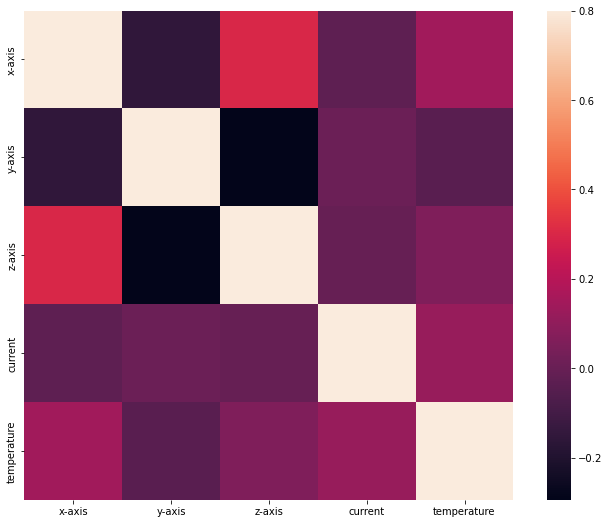

In [163]:
# heat map of correlation of features
correlation_matrix = dataframe.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [59]:
classes_orig = dataframe['fault']
classes_orig = classes_orig.to_numpy()
classes_orig.reshape(-1,)
unique_classes = np.unique(classes_orig)
print('unique labels',unique_classes)

# ENCODING + catogarizing classes acccording to their unique labels  
classes = pd.Categorical(classes_orig, categories=unique_classes).codes
#classes.reshape(225,-1)
print(classes)
print(classes.shape)

unique labels ['Clean' 'Hindrance' 'Temperature' 'Vibrational']
[1 1 1 ... 0 0 0]
(20000,)


In [60]:
data = dataframe[["x-axis", "y-axis","z-axis","current","temperature"]]
scaler = MinMaxScaler(feature_range=(-50,50))
data_1 = scaler.fit_transform(data)
#data_1 = data.to_numpy()
#data_1 = data_1.reshape(-1,20,20)
print("Data 1shape ",data_1.shape)
print(data_1)


Data 1shape  (20000, 5)
[[  8.4293755    2.20779221  -0.30416092 -44.25837225 -17.85714286]
 [ 16.92575717  -5.54858934   3.35388109 -44.73684878 -17.85714286]
 [ 14.23210935  -5.38737125   3.11055236 -44.73684878 -17.85714286]
 ...
 [ 13.45483785  -6.17554859   4.42452754 -44.25837225   1.78571429]
 [  9.4478692    1.96596507   3.13488523 -46.17224213   1.78571429]
 [  7.4108818    5.40528437  -0.47449104 -42.82296078   1.78571429]]


In [61]:
data_train, data_test, classes_train, classes_test = train_test_split(data_1,classes, test_size=0.3, random_state=750,stratify=classes)

#for cross validation check dividing training data again

data_train, data_valid, classes_train, classes_valid = train_test_split(data_train,classes_train, test_size=0.3, random_state=454,stratify=classes_train)

In [62]:
print(data_test.shape)
print(data_train.shape)
print(classes_train.shape)
print(classes_test.shape)

(6000, 5)
(9800, 5)
(9800,)
(6000,)


In [63]:
# reshaping data
data_train = data_train.reshape(-1,5,1)
data_test = data_test.reshape(-1,5,1)
data_valid = data_valid.reshape(-1,5,1)

from keras.utils import to_categorical
classes_train = to_categorical(classes_train)
classes_train = classes_train.reshape(-1,4)
classes_test = to_categorical(classes_test)
classes_test = classes_test.reshape(-1,4)
classes_valid = to_categorical(classes_valid)
classes_valid = classes_valid.reshape(-1,4)
# Shuffling our data
index = np.random.permutation(len(data_train))
data_train = data_train[index]
classes_train =  classes_train[index]

print('training data shape: ', data_train.shape)
print('validation data shape: ', data_valid.shape)
print('testing data shape: ', data_test.shape)
print('training classes shape: ', classes_train.shape)
print('validation classes shape: ', classes_valid.shape)
print('testing classes shape: ', classes_test.shape)


training data shape:  (9800, 5, 1)
validation data shape:  (4200, 5, 1)
testing data shape:  (6000, 5, 1)
training classes shape:  (9800, 4)
validation classes shape:  (4200, 4)
testing classes shape:  (6000, 4)


In [80]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Conv1D, MaxPooling1D, Flatten

In [147]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape = (5,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=96, kernel_size=1, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 5, 128)            256       
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 2, 96)             12384     
_________________________________________________________________
dropout_23 (Dropout)         (None, 2, 96)             0         
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 1, 96)             0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 96)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 96)              

In [162]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
N_Network = model.fit(data_train , classes_train, epochs=100, batch_size=128, validation_data=(data_valid, classes_valid)) 

Epoch 1/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.7208 - val_loss: 0.6387 - val_accuracy: 0.7295
Epoch 2/100
77/77 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.7120 - val_loss: 0.6561 - val_accuracy: 0.7171
Epoch 3/100
77/77 [==============================] - 0s 4ms/step - loss: 0.6362 - accuracy: 0.7259 - val_loss: 0.6608 - val_accuracy: 0.7186
Epoch 4/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6333 - accuracy: 0.7242 - val_loss: 0.6349 - val_accuracy: 0.7245
Epoch 5/100
77/77 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.7230 - val_loss: 0.6414 - val_accuracy: 0.7200
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6366 - accuracy: 0.7184 - val_loss: 0.6630 - val_accuracy: 0.7074
Epoch 7/100
77/77 [==============================] - 0s 5ms/step - loss: 0.6353 - accuracy: 0.7271 - val_loss: 0.6501 - val_accuracy: 0.7210
Epoch 8/100
7

KeyboardInterrupt: 

In [156]:

import time

start = time.time()
model.evaluate(data_test,classes_test, batch_size = 128, verbose = 0)
end = time.time()
print(end - start)


0.10372328758239746


In [157]:
model.evaluate(data_test,classes_test, batch_size = 128, verbose = 0)

[0.6572896838188171, 0.7133333086967468]

In [158]:
prediction = model.predict(data_test)
prediction_classes = list([])
for each_prediction in prediction:
    prediction_classes.append(list(each_prediction).index(max(each_prediction)))

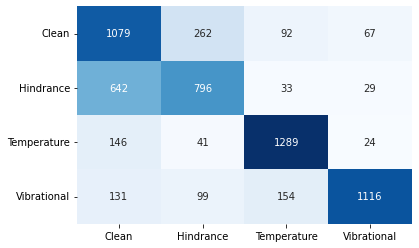

In [159]:
from sklearn.metrics import confusion_matrix
true_classes = np.argmax(classes_test, axis = 1)
matrix = confusion_matrix(true_classes, prediction_classes)

import seaborn as sns
matrix = pd.DataFrame(matrix)
plt.figure()
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = unique_classes,
           yticklabels = unique_classes, cmap = "Blues", cbar = False)
plt.xticks()
plt.show()

In [160]:
model.save("test_riggin_cnn.h5")

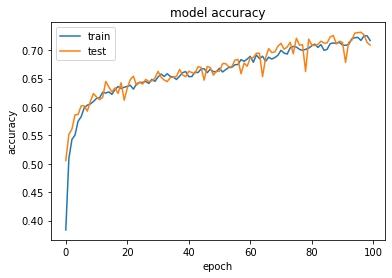

In [161]:
plt.plot(N_Network.history['accuracy'])
plt.plot(N_Network.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

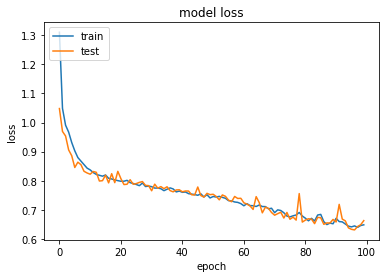

In [155]:
# summarize history for loss
plt.plot(N_Network.history['loss'])
plt.plot(N_Network.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()